#**Задание 1**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from skimage.color import rgb2gray


def preprocess(array):
    """
    Нормализует предоставленный массив и преобразует его в соответствующий формат.

    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array


def noise(array):
    """
    Добавляет случайный шум к каждому изображению в предоставленном массиве.

    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Отображает десять случайных изображений из каждого из предоставленных массивов.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(rgb2gray(image1).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rgb2gray(image2).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

170498071/170498071 [==============================] - 2s 0us/step


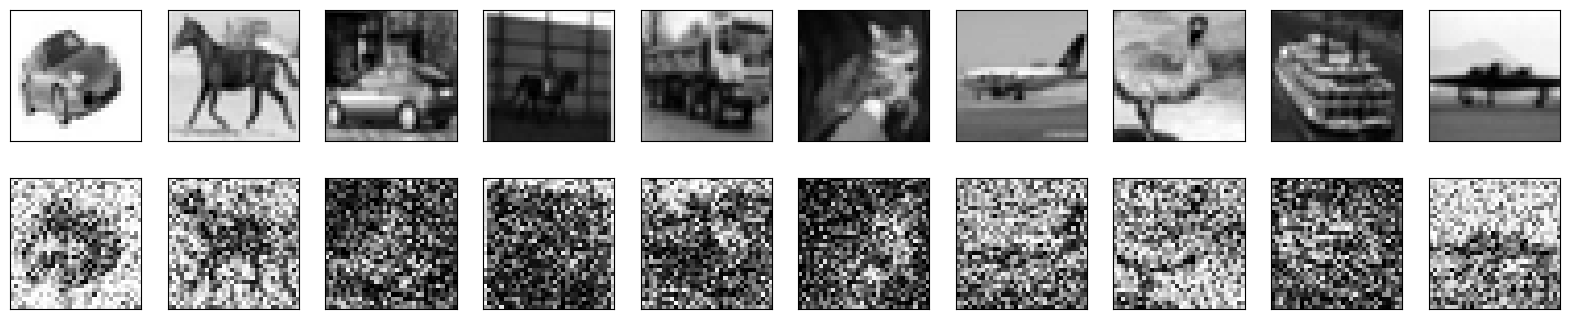

In [ ]:
# Поскольку для кодирования и декодирования нам нужны только изображения из набора данных, мы
# не будем использовать метки классов
(train_data, _), (test_data, _) = cifar10.load_data()

# Нормализация и изменение формы данных
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Создание копии данных с добавленным шумом
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Отображение данных выборки и его версии с добавленным шумом
display(train_data, noisy_train_data)

In [ ]:
input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)



# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 32)       9248  

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
391/391 [==============================] - 18s 14ms/step - loss: 0.5822 - val_loss: 0.5654
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5627 - val_loss: 0.5619
Epoch 3/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5600 - val_loss: 0.5602
Epoch 4/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5587 - val_loss: 0.5594
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5579 - val_loss: 0.5583
Epoch 6/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5574 - val_loss: 0.5578
Epoch 7/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5569 - val_loss: 0.5574
Epoch 8/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5565 - val_loss: 0.5570
Epoch 9/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5562 - val_loss: 0.5568
Epoch 10/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5559 - val_l

313/313 [==============================] - 1s 3ms/step


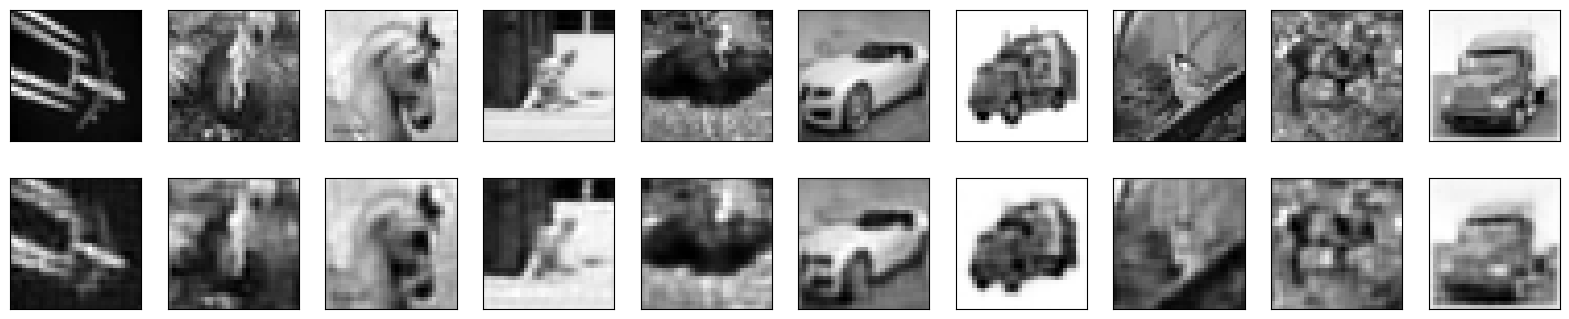

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

#**Задание 2**

In [ ]:

autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
391/391 [==============================] - 5s 13ms/step - loss: 0.5771 - val_loss: 0.5748
Epoch 2/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5730 - val_loss: 0.5733
Epoch 3/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5721 - val_loss: 0.5726
Epoch 4/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5716 - val_loss: 0.5722
Epoch 5/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5712 - val_loss: 0.5719
Epoch 6/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5709 - val_loss: 0.5716
Epoch 7/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5707 - val_loss: 0.5713
Epoch 8/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5705 - val_loss: 0.5716
Epoch 9/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5703 - val_loss: 0.5711
Epoch 10/100
391/391 [==============================] - 5s 12ms/step - loss: 0.570

313/313 [==============================] - 1s 5ms/step


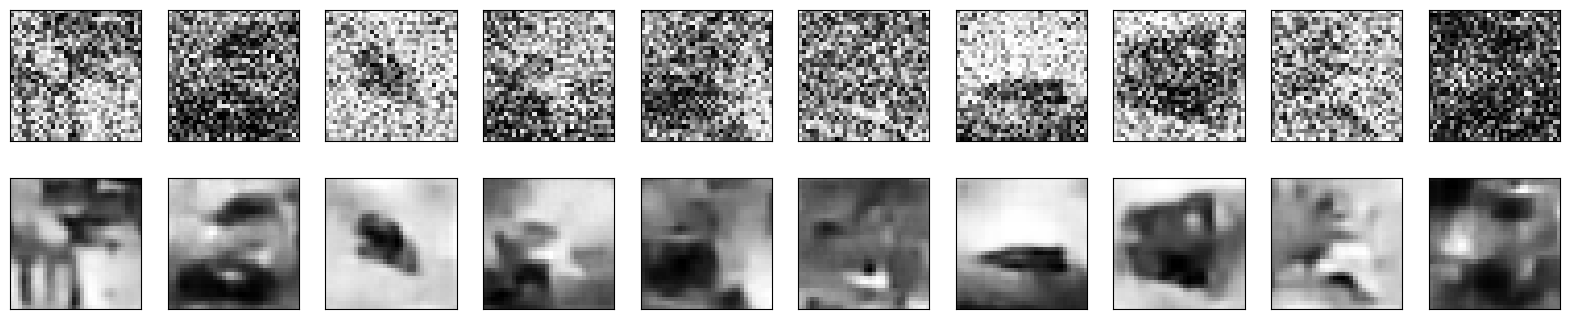

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

#**Задание 3**

In [ ]:
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgb2gray
from skimage.transform import resize
from skimage.io import imsave
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os

In [ ]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16() # Импортируем предобученную модель VGG16 с параметрами по умолчанию
newmodel = Sequential() # Создаём пустую модель

for i, layer in enumerate(vggmodel.layers): # Заполняем пустую модель слоями из предобученной модели VGG16 
    if i<19:          # Только до 19-го слоя, чтобы включить только слои, используемые для извлечения признаков
      newmodel.add(layer)

newmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in newmodel.layers:
  layer.trainable=False   # Мы не хотим снова обучать эти слои, поэтому False. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Elephant'


train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(224, 224), batch_size=100, class_mode=None)

print(train)

Found 150 images belonging to 1 classes.


In [ ]:
print(train[0].shape)

(100, 224, 224, 3)


In [ ]:
X_train =[]
Y_train =[]
X_val =[]
Y_val =[]
save_folder = '/content/'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X_train.append(lab[:,:,0])
      Y_train.append(lab[:,:,1:] / 128) # Значения A и B находятся в диапазоне от -127 до 128, 
      # поэтому мы делим значения на 128, чтобы ограничить значения от -1 до 1.
  except:
     print('error')
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

X_train = X_train.reshape(X_train.shape+(1,))
X_val = X_val.reshape(X_val.shape+(1,))

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)  
print(Y_val.shape)

(100, 224, 224, 1)
(100, 224, 224, 2)
(0, 1)
(0,)


In [ ]:
vggfeatures = []
for i, sample in enumerate(X_train):
  sample = gray2rgb(sample)
  sample = sample.reshape((1,224,224,3))
  sample = keras.applications.vgg16.preprocess_input(sample)
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vggfeatures.append(prediction)
vggfeatures = np.array(vggfeatures)
print(vggfeatures.shape)

1/1 [==============================] - 0s 20ms/step
(100, 7, 7, 512)


In [ ]:
#Decoder
model = Sequential()

model.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.summary()


model.compile(optimizer='Adam', loss='mse' , metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 256)         1179904   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         295040    
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)       

In [ ]:
model.fit(vggfeatures, Y_train, verbose=1, epochs=1000, batch_size=256)

model.save('/content/colorize_autoencoder_VGG16.h5')

Epoch 1/1000
1/1 [==============================] - 0s 105ms/step - loss: 0.0018 - accuracy: 0.8702
Epoch 2/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.0018 - accuracy: 0.8699
Epoch 3/1000
1/1 [==============================] - 0s 79ms/step - loss: 0.0018 - accuracy: 0.8704
Epoch 4/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.0018 - accuracy: 0.8698
Epoch 5/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.0018 - accuracy: 0.8706
Epoch 6/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.0018 - accuracy: 0.8698
Epoch 7/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0018 - accuracy: 0.8706
Epoch 8/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.0018 - accuracy: 0.8697
Epoch 9/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.0018 - accuracy: 0.8707
Epoch 10/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.0018 - accuracy: 0.8697
Epoch 11

In [ ]:
model = tf.keras.models.load_model('/content/colorize_autoencoder_VGG16.h5',
                                   custom_objects=None,
                                   compile=True)

In [ ]:
import os
from PIL import Image

folder = '/content/drive/MyDrive/Elephant/Elephant_train'

new_folder = '/content/new'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

num_images = 100

count = 0
for filename in os.listdir(folder):
    if filename.endswith('.jpg') and count < num_images:
        image_path = os.path.join(folder, filename)
        new_filename = f'new{count+1}.jpg'
        new_image_path = os.path.join(new_folder, new_filename)
        with Image.open(image_path).convert('L') as im:
            im_resized = im.resize((224, 224))
            im_resized.save(new_image_path)
        count += 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


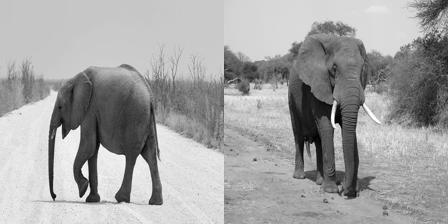

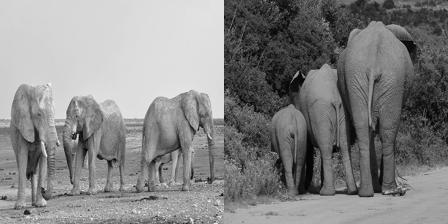

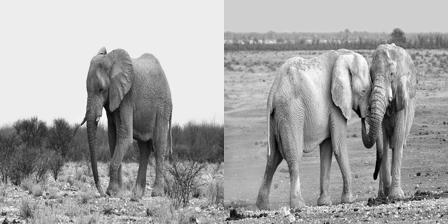

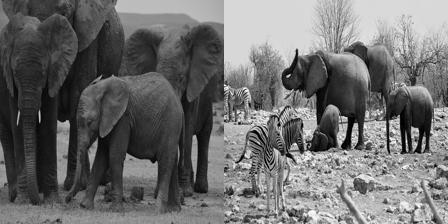

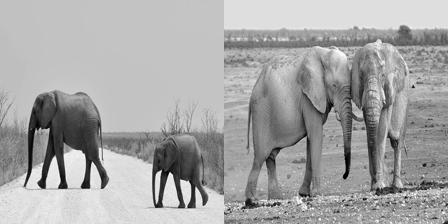

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

imo_1 = cv2.imread("/content/new/new1.jpg")
im_1 = cv2.imread("/content/new/new2.jpg")
imo_2 = cv2.imread("/content/new/new3.jpg")
im_2 = cv2.imread("/content/new/new4.jpg")
imo_3 = cv2.imread("/content/new/new5.jpg")
im_3 = cv2.imread("/content/new/new6.jpg")
imo_4 = cv2.imread("/content/new/new7.jpg")
im_4 = cv2.imread("/content/new/new8.jpg")
imo_5 = cv2.imread("/content/new/new9.jpg")
im_5 = cv2.imread("/content/new/new10.jpg")

pred_1 = np.concatenate((imo_1, im_1), axis=1)
pred_2 = np.concatenate((imo_2, im_2), axis=1)
pred_3 = np.concatenate((imo_3, im_3), axis=1)
pred_4 = np.concatenate((imo_4, im_4), axis=1)
pred_5 = np.concatenate((imo_5, im_5), axis=1)

cv2_imshow(pred_1)
cv2_imshow(pred_2)
cv2_imshow(pred_3)
cv2_imshow(pred_4)
cv2_imshow(pred_5)